In [12]:
%load_ext autoreload
%autoreload 2

import torch
import numpy as np
import matplotlib.pyplot as plt

from SNN.snn import *
from SNN.Izhikevich import IzhikevichLayer
from SNN.stimulation import *
from SNN.receptive_field import *

# Setup
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device = 'cpu'


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


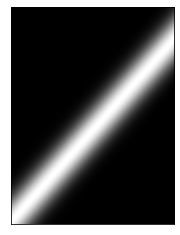

torch.Size([320, 240, 1])

In [13]:
# Set parameters for stimuli generation
rotation_degree = 45
num_frames = 1
image_height = 320
image_width = 240

# Generate stimuli
stimulation = generate_stimulus_series(rotation_degree, num_frames, image_height, image_width,amplitude = 1, visualize=True, device=device)

stimulation.shape

In [14]:
snn = SNN()


In [77]:
sa_spikes, ra_spikes = snn(stimulation)
sa_spikes, ra_spikes

snn.sa_layer.v

tensor([-70.7386, -70.7386, -70.7386, -70.7386, -70.7385, -70.7352, -70.3833,
        -68.0734, -70.7386, -70.7386, -70.7386, -70.7386, -70.7335, -70.6772,
        -69.4576, -26.3683, -70.7386, -70.7386, -70.7386, -70.7383, -70.7118,
        -69.9628, -58.2488, -27.9651, -70.7386, -70.7385, -70.7384, -70.7247,
        -69.8212, -39.6265, -20.4683, -21.5272, -70.7386, -70.7385, -70.7059,
        -70.4320, -63.5990, -65.0000,  -5.1889, -39.5540, -70.7375, -70.7301,
        -70.4018, -64.9407, -65.0000, -24.3057, -65.0000, -66.7095, -70.7322,
        -70.5192, -65.7183, -65.0000, -20.3910, -65.0000, -65.0940, -70.0471,
        -70.4316, -67.2446, -65.0000, -14.9200, -65.0000, -62.0063, -70.1564,
        -70.7065, -68.8909, -51.8550, -17.8101, -65.0000, -54.7296, -70.2767,
        -70.7229, -70.7383,  -9.6643, -33.1967, -23.0619, -60.7195, -69.6455,
        -70.7121, -70.7384, -70.7386, -15.1993, -22.8031, -65.0000, -69.3370,
        -70.7109, -70.7334, -70.7385, -70.7386])

In [80]:
# Instantiate the SNN
snn = SNN()

# Lists to store spikes for each iteration in 2D shape
sa_spikes_2d_list = []
ra_spikes_2d_list = []

# Iterate the stimulus through the SNN 100 times
for _ in range(num_iterations):
    sa_spikes, ra_spikes = snn(stimulation)
    sa_spikes_2d_list.append(sa_spikes.reshape(sa_rf_dim))
    ra_spikes_2d_list.append(ra_spikes.reshape(ra_rf_dim))

# Convert lists to tensors
sa_spikes_2d_tensor = torch.stack(sa_spikes_2d_list)
ra_spikes_2d_tensor = torch.stack(ra_spikes_2d_list)

# Calculate the average firing rate for 2D grid
sa_firing_rate_2d = sa_spikes_2d_tensor.mean(dim=0)
ra_firing_rate_2d = ra_spikes_2d_tensor.mean(dim=0)

# Visualizing the 2D firing rates as heatmaps
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.imshow(sa_firing_rate_2d, cmap='hot', interpolation='nearest')
plt.colorbar(label='Firing Rate')
plt.title('SA Firing Rate Heatmap')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')

plt.subplot(1, 2, 2)
plt.imshow(ra_firing_rate_2d, cmap='hot', interpolation='nearest')
plt.colorbar(label='Firing Rate')
plt.title('RA Firing Rate Heatmap')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')

plt.tight_layout()
plt.show()

NameError: name 'sa_rf_dim' is not defined